In [1]:
import numpy as np
import torch
from model import *
from train import *
import matplotlib.pyplot as plt

In [2]:
def plot_result(
        r_list, 
        x_list,
        y_list,
        title,
        x_label):
    o = 20
    ER_means = [np.mean(y) for y in y_list]
    ER_std = [np.std(y, ddof=1) / np.sqrt(len(y)) for y in y_list]  # Standard error of the mean
    ER_upper = [m + s*1.96 for m, s in zip(ER_means, ER_std)]
    ER_lower = [m - s*1.96 for m, s in zip(ER_means, ER_std)]
    Bounds = [c['bound'] * o for c in r_list]

    fig, ax1 = plt.subplots()

    ax1.plot(x_list, ER_means, label='ER', color='blue')
    ax1.fill_between(x_list, ER_lower, ER_upper, color='blue', alpha=0.2, label='CI')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('ER')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(x_list, Bounds, label='Bound', color='orange', marker='o')
    ax2.set_ylabel('Bound')
    ax2.tick_params(axis='y')

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.title(title)

    plt.show()

In [8]:
source_lr = 0.1
target_lr = 0.01
source_max_iter = 200
target_max_iter = 200
num_experiments = 100

configs = {
        "d": 40,
        "k": 5,
        "n1": 8000,
        "n2": 80,
        "nT": 12,
        "rho": 1.0,
        "sigma": 0.1,
        "delta": 0.05,
        "c": 1.0,
        "A1": True,
        "A2": True,
        "A3": True,
        "A4": True,
    }

In [9]:
result = experimentation(configs).copy()
result['bound'] = get_bound(result)
r_list = []
r_list.append(result)
C = np.concatenate([np.arange(0.95, 0.0, -0.05)])
configs["A2"]=False
for c in C:
    configs["c"]= c
    r = experimentation(configs).copy()
    r['bound'] = get_bound(r)
    r_list.append(r)

Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 True, A4.4 True
Source tasks generated: 12
Target tasks generated: 100
Training source tasks
	 Epoch 0 loss:  19.037
	 Epoch 50 loss:  0.472
	 Epoch 100 loss:  0.037
	 Epoch 150 loss:  0.010
	 Epoch 200 loss:  0.010
Training target task
Task ID: target_0
	 Epoch 0 loss:  10.486
	 Epoch 50 loss:  0.133
	 Epoch 100 loss:  0.010
	 Epoch 120 loss:  0.009
Task ID: target_1
	 Epoch 0 loss:  36.388
	 Epoch 50 loss:  6.326
	 Epoch 100 loss:  1.038
	 Epoch 150 loss:  0.148
	 Epoch 200 loss:  0.029
Task ID: target_2
	 Epoch 0 loss:  39.280
	 Epoch 50 loss:  3.015
	 Epoch 100 loss:  0.687
	 Epoch 150 loss:  0.103
	 Epoch 200 loss:  0.017
Task ID: target_3
	 Epoch 0 loss:  26.822
	 Epoch 50 loss:  2.059
	 Epoch 100 loss:  0.307
	 Epoch 150 loss:  0.033
	 Epoch 200 loss:  0.011
Task ID: target_4
	 Epoch 0 loss:  9.693
	 Epoch 50 loss:  0.179
	 Epoch 95 loss:  0.009
Task ID: target_5
	 Epoch 0 loss:  8.448
	 Epoch 50 loss:  0.443
	

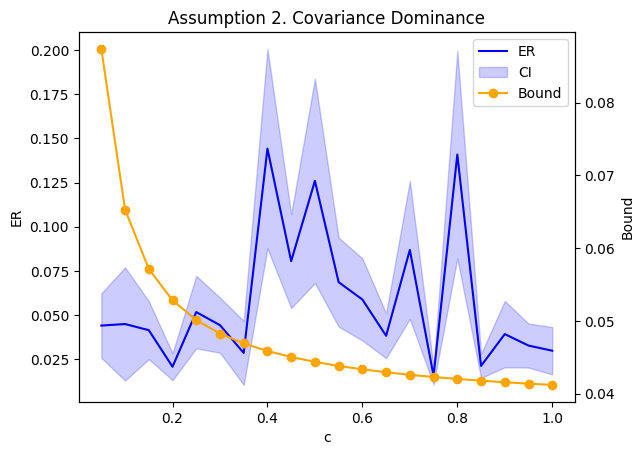

In [11]:
x_list = [c['c'] for c in r_list]
y_list = [c['ER'] for c in r_list]
plot_result(r_list, x_list, y_list, 'Assumption 2. Covariance Dominance', x_label='c')

In [16]:
configs = {
        "d": 40,
        "k": 3,
        "n1": 8000,
        "n2": 80,
        "nT": 50,
        "rho": 1.0,
        "sigma": 0.1,
        "delta": 0.05,
        "c": 1.0,
        "A1": True,
        "A2": True,
        "A3": True,
        "A4": True,
    }
r_list = []
K = np.arange(3, 20, 1)
configs["A3"]=False
for k in K:
    configs["k"]= k
    r = experimentation(configs).copy()
    r['bound'] = get_bound(r)
    r_list.append(r)

Parameter assumptions checked
Experiment: A4.1 True, A4.2 True, A4.3 False, A4.4 True
Source tasks generated: 50
Target tasks generated: 100
Training source tasks
	 Epoch 0 loss:  36.865
	 Epoch 50 loss:  0.569
	 Epoch 100 loss:  0.129
	 Epoch 150 loss:  0.040
	 Epoch 200 loss:  0.013
Training target task
Task ID: target_0
	 Epoch 0 loss:  17.742
	 Epoch 50 loss:  1.454
	 Epoch 100 loss:  0.561
	 Epoch 150 loss:  0.191
	 Epoch 200 loss:  0.068
Task ID: target_1
	 Epoch 0 loss:  5.124
	 Epoch 50 loss:  1.262
	 Epoch 100 loss:  0.191
	 Epoch 150 loss:  0.041
	 Epoch 200 loss:  0.032
Task ID: target_2
	 Epoch 0 loss:  4.716
	 Epoch 50 loss:  0.810
	 Epoch 100 loss:  0.072
	 Epoch 150 loss:  0.028
	 Epoch 168 loss:  0.027
Task ID: target_3
	 Epoch 0 loss:  75.354
	 Epoch 50 loss:  11.693
	 Epoch 100 loss:  2.573
	 Epoch 150 loss:  1.610
	 Epoch 200 loss:  1.108
Task ID: target_4
	 Epoch 0 loss:  12.668
	 Epoch 50 loss:  1.093
	 Epoch 100 loss:  0.347
	 Epoch 150 loss:  0.094
	 Epoch 200 lo

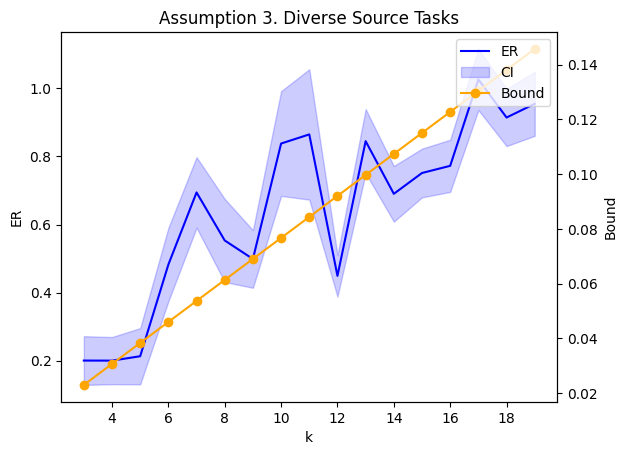

In [17]:
x_list = [c['k'] for c in r_list]
y_list = [c['ER'] for c in r_list]
plot_result(r_list, x_list, y_list, 'Assumption 3. Diverse Source Tasks', x_label='k')